In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC

from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

In [6]:
df = pd.read_csv('heart.csv')

print(df.head())
print(df.info())
print(df['target'].value_counts())

   age  sex  cp  trestbps  chol  fbs  restecg  thalach  exang  oldpeak  slope  \
0   52    1   0       125   212    0        1      168      0      1.0      2   
1   53    1   0       140   203    1        0      155      1      3.1      0   
2   70    1   0       145   174    0        1      125      1      2.6      0   
3   61    1   0       148   203    0        1      161      0      0.0      2   
4   62    0   0       138   294    1        1      106      0      1.9      1   

   ca  thal  target  
0   2     3       0  
1   0     3       0  
2   0     3       0  
3   1     3       0  
4   3     2       0  
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1025 entries, 0 to 1024
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1025 non-null   int64  
 1   sex       1025 non-null   int64  
 2   cp        1025 non-null   int64  
 3   trestbps  1025 non-null   int64  
 4   chol      1025 non-null   int64  
 

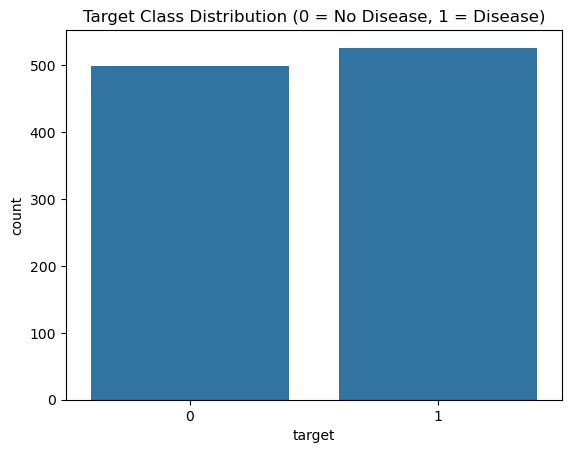

In [7]:
sns.countplot(data=df, x='target')
plt.title('Target Class Distribution (0 = No Disease, 1 = Disease)')
plt.show()

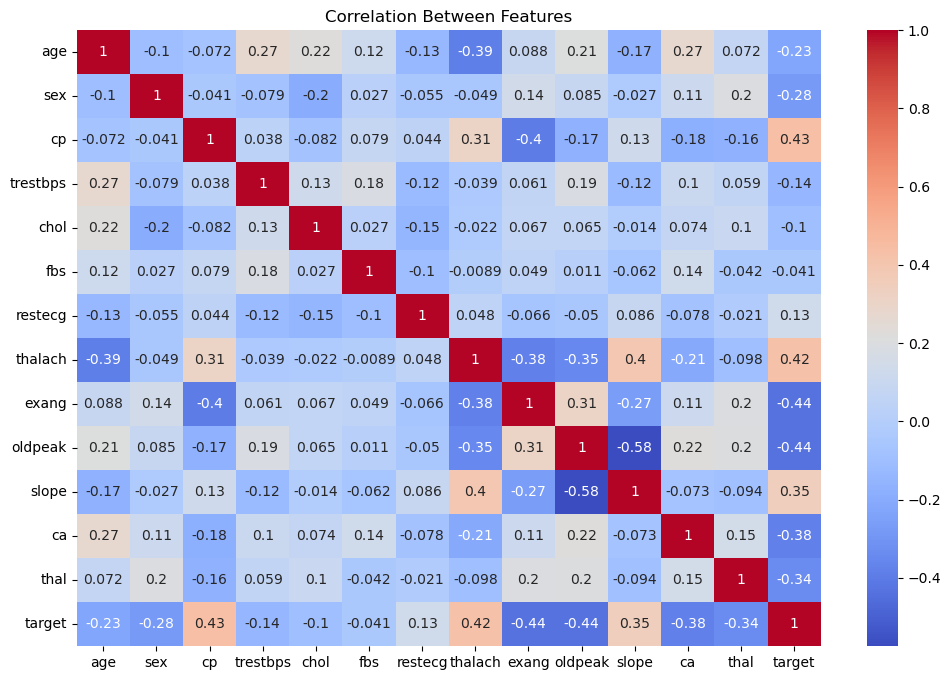

In [8]:
plt.figure(figsize=(12,8))
sns.heatmap(df.corr(), annot=True, cmap='coolwarm')
plt.title('Correlation Between Features')
plt.show()

In [9]:
categorical = ['cp', 'restecg', 'slope', 'thal', 'sex', 'fbs', 'exang', 'ca']
numerical = ['age', 'trestbps', 'chol', 'thalach', 'oldpeak']

In [10]:
X = df.drop('target', axis=1)
y = df['target']

In [11]:
numeric_transformer = Pipeline(steps=[
    ('scaler', StandardScaler())
])

categorical_transformer = Pipeline(steps=[
    ('onehot', OneHotEncoder(handle_unknown='ignore'))
])

preprocessor = ColumnTransformer(
    transformers=[
        ('num', numeric_transformer, numerical),
        ('cat', categorical_transformer, categorical)
    ])

In [12]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42, stratify=y)

In [13]:
log_reg = Pipeline(steps=[('preprocessor', preprocessor),
                          ('classifier', LogisticRegression(max_iter=1000))])

In [14]:
rf = Pipeline(steps=[('preprocessor', preprocessor),
                     ('classifier', RandomForestClassifier(n_estimators=100, random_state=42))])

In [15]:
svm = Pipeline(steps=[('preprocessor', preprocessor),
                      ('classifier', SVC(kernel='rbf', probability=True))])

In [20]:
models = {'Logistic Regression': log_reg,
          'Random Forest': rf,
          'SVM': svm}

results = {}

for name, model in models.items():
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    acc = accuracy_score(y_test, y_pred)
    print(f"\n{name} Accuracy: {acc:.4f}")
    print(classification_report(y_test, y_pred))
    results[name] = acc


Logistic Regression Accuracy: 0.8734
              precision    recall  f1-score   support

           0       0.87      0.87      0.87       150
           1       0.87      0.88      0.88       158

    accuracy                           0.87       308
   macro avg       0.87      0.87      0.87       308
weighted avg       0.87      0.87      0.87       308


Random Forest Accuracy: 0.9903
              precision    recall  f1-score   support

           0       0.98      1.00      0.99       150
           1       1.00      0.98      0.99       158

    accuracy                           0.99       308
   macro avg       0.99      0.99      0.99       308
weighted avg       0.99      0.99      0.99       308


SVM Accuracy: 0.9318
              precision    recall  f1-score   support

           0       0.92      0.94      0.93       150
           1       0.94      0.92      0.93       158

    accuracy                           0.93       308
   macro avg       0.93      0.93   

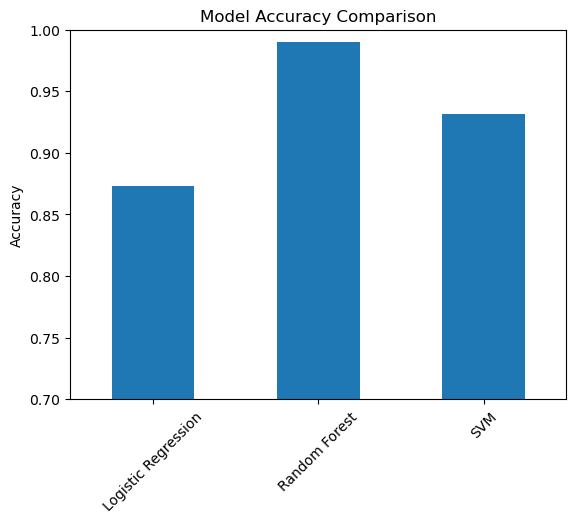

In [21]:
result_df = pd.DataFrame.from_dict(results, orient='index', columns=['Accuracy'])
result_df.plot(kind='bar', legend=False, ylim=(0.7, 1.0))
plt.title('Model Accuracy Comparison')
plt.ylabel('Accuracy')
plt.xticks(rotation=45)
plt.show()

In [19]:
best_model = max(results, key=results.get)
print(f"Recommended Model: {best_model} with Accuracy: {results[best_model]:.2f}")

Recommended Model: Random Forest with Accuracy: 0.99
